# Classification to classify Chinstrap, Gentoo, and Adelie penguins

To train this model, I will use the dataset ["🐧 Palmer Penguins for binary classification"](https://www.kaggle.com/datasets/martaarroyo/palmer-penguins-for-binary-classification/data) obtained from Kaggle.

The dataset used in this study contains detailed information on different penguin species collected during a scientific study in the Antarctic region. This dataset, called "Penguins," includes physical measurements and demographic characteristics of penguins of three species: Adelie, Chinstrap, and Gentoo. These measurements include beak length and depth, flipper length, body mass, the island where they were observed, and the penguin's sex.

![Penguins](pngns.jpg)

The goal of this project is to build a classification model that can accurately predict a penguin's species based on its physical and demographic characteristics.

## Dataset preprocessing

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

First, let's do a exploratory dive into the dataset:

In [5]:
df = pd.read_csv('penguins.csv')
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


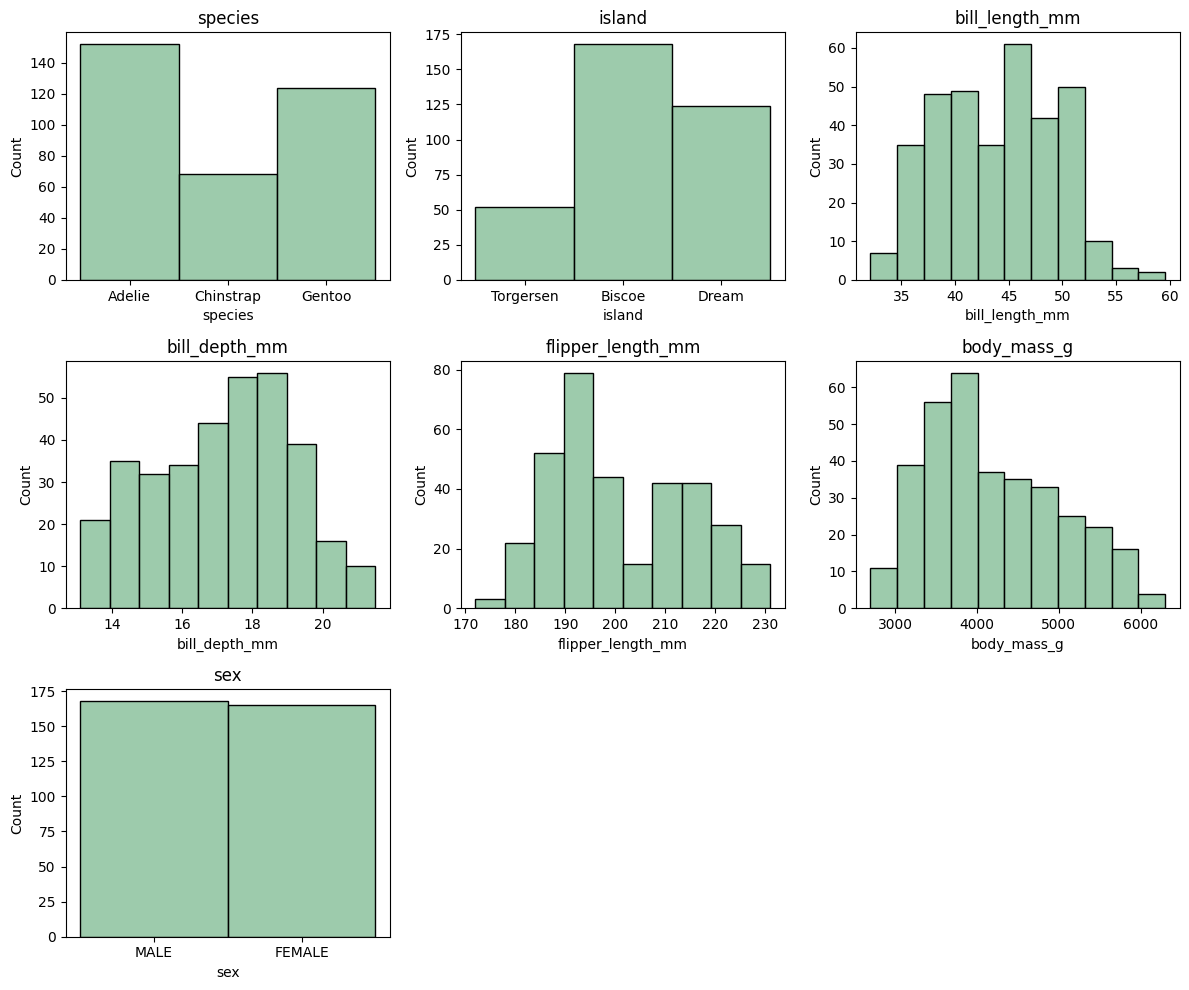

In [6]:
sns.set_palette('crest') 

plt.figure(figsize=(12, 10))
for i, column in enumerate(df.columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[column])
    plt.title(column)
plt.tight_layout()
plt.show()


In [7]:
df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

We will just rename the columns for a esiest manage of them on the following processing of the dataset:

In [8]:
df = df.rename(columns={'bill_length_mm': 'billLength',
                        'bill_depth_mm': 'billDepth',
                        'flipper_length_mm': 'flipperLength',
                        'body_mass_g': 'bodyMass'})
df

,species,island,billLength,billDepth,flipperLength,bodyMass,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


Before using an encoder for columns with specific classes, I will check for missing or null values

In [9]:
df.isnull().sum()

species           0
island            0
billLength        2
billDepth         2
flipperLength     2
bodyMass          2
sex              11
dtype: int64

Although the number of missing/null values is not significant, I will replace those values with the mean (or mode) of each column:

In [10]:

df['billLength'].fillna(df['billLength'].mean(), inplace=True)
df['billDepth'].fillna(df['billDepth'].mean(), inplace=True)
df['flipperLength'].fillna(df['flipperLength'].mean(), inplace=True)
df['bodyMass'].fillna(df['bodyMass'].mean(), inplace=True)

df['sex'].fillna(df['sex'].mode()[0], inplace=True)

/tmp/ipykernel_28735/3531800403.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['billLength'].fillna(df['billLength'].mean(), inplace=True)
/tmp/ipykernel_28735/3531800403.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

In [11]:
df.isnull().sum()

species          0
island           0
billLength       0
billDepth        0
flipperLength    0
bodyMass         0
sex              0
dtype: int64

Now that there are no null or missing values, I will use the label encoder for the columns: 'species', 'island' and 'sex'

In [12]:
encoder = LabelEncoder()

df['species'] = encoder.fit_transform(df['species'])
df['island'] = encoder.fit_transform(df['island'])
df['sex'] = encoder.fit_transform(df['sex'])

df.sample(10)

,species,island,billLength,billDepth,flipperLength,bodyMass,sex
272,2,0,45.1,14.4,210.0,4400.0,0
247,2,0,47.8,15.0,215.0,5650.0,1
115,0,0,42.7,18.3,196.0,4075.0,1
241,2,0,45.1,14.5,215.0,5000.0,0
23,0,0,38.2,18.1,185.0,3950.0,1
270,2,0,46.6,14.2,210.0,4850.0,0
215,1,1,55.8,19.8,207.0,4000.0,1
130,0,2,38.5,17.9,190.0,3325.0,0
71,0,2,39.7,18.4,190.0,3900.0,1
50,0,0,39.6,17.7,186.0,3500.0,0


In [13]:
df.sample(10)

,species,island,billLength,billDepth,flipperLength,bodyMass,sex
235,2,0,49.3,15.7,217.0,5850.0,1
279,2,0,50.4,15.3,224.0,5550.0,1
86,0,1,36.3,19.5,190.0,3800.0,1
336,2,0,44.5,15.7,217.0,4875.0,1
56,0,0,39.0,17.5,186.0,3550.0,0
10,0,2,37.8,17.1,186.0,3300.0,1
296,2,0,47.5,14.2,209.0,4600.0,0
229,2,0,46.8,15.4,215.0,5150.0,1
176,1,1,46.7,17.9,195.0,3300.0,0
191,1,1,53.5,19.9,205.0,4500.0,1


### Defining and separating independent variables from dependent variables (species)

In [14]:
X = df.drop(['species'], axis=1)
y = df['species']

X

,island,billLength,billDepth,flipperLength,bodyMass,sex
0,2,39.10000,18.70000,181.000000,3750.000000,1
1,2,39.50000,17.40000,186.000000,3800.000000,0
2,2,40.30000,18.00000,195.000000,3250.000000,0
3,2,43.92193,17.15117,200.915205,4201.754386,1
4,2,36.70000,19.30000,193.000000,3450.000000,0
...,...,...,...,...,...,...
339,0,43.92193,17.15117,200.915205,4201.754386,1
340,0,46.80000,14.30000,215.000000,4850.000000,0
341,0,50.40000,15.70000,222.000000,5750.000000,1
342,0,45.20000,14.80000,212.000000,5200.000000,0


### Splitting the dataset between training and testing

In [15]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

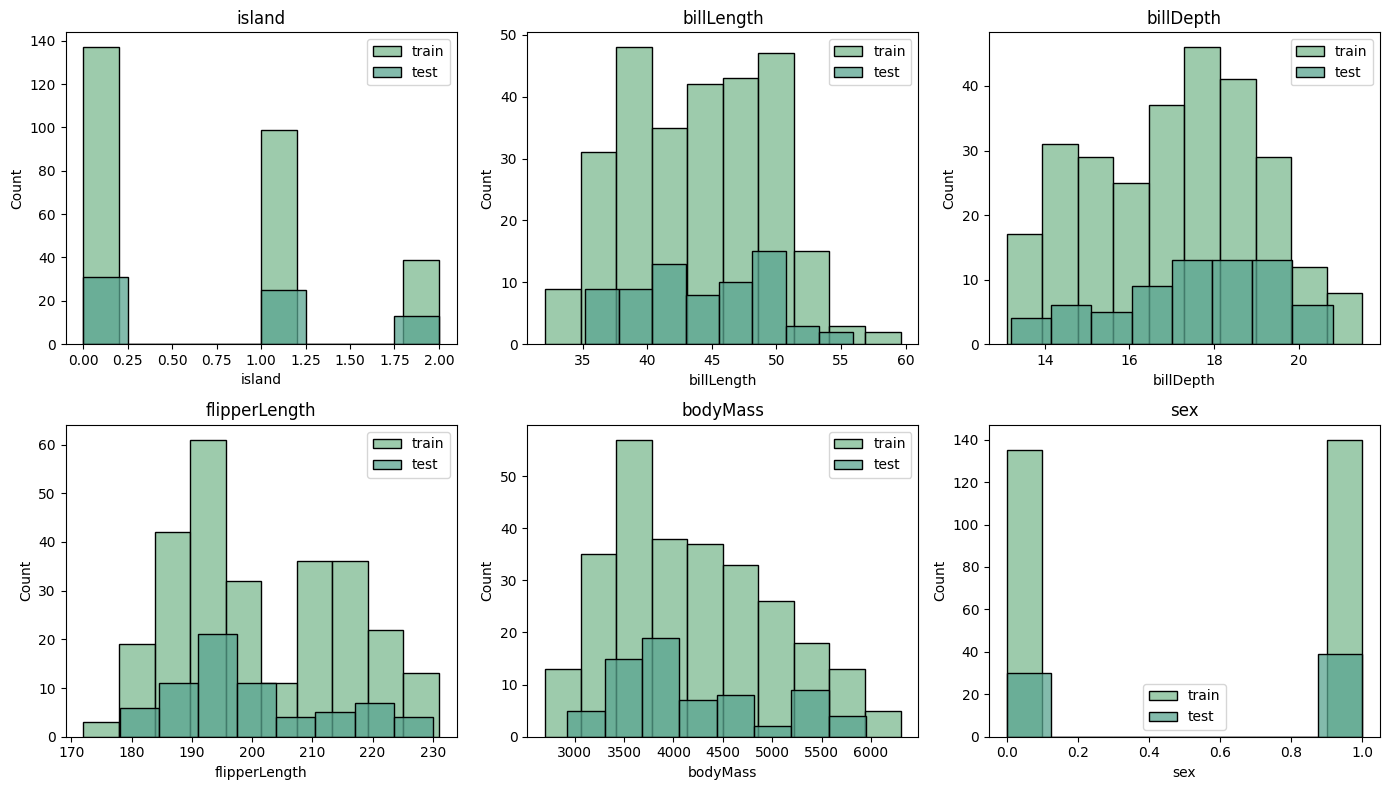

In [16]:
plt.figure(figsize=(14, 8))
for i, column in enumerate(X.columns, 1):
    sns.set_palette('crest') 
    plt.subplot(2, 3, i)
    sns.histplot(xtrain[column],  label='train')
    sns.histplot(xtest[column],  label='test')
    plt.title(column)
    plt.legend()
plt.tight_layout()
plt.show()

### Scaling

In [17]:
scaler = StandardScaler()
xtrain_scaled = scaler.fit_transform(xtrain)
xtest_scaled = scaler.transform(xtest)

xtrain_scaled

array([[-0.89862768, -1.51790052, -0.43753238, -0.43352258, -1.06446304,
        -1.01835015],
       [-0.89862768,  0.53915607, -0.84256773,  0.97077264,  1.18198874,
         0.98198051],
       [ 1.89371821, -0.84435102,  1.28386784, -0.43352258,  0.58917507,
         0.98198051],
       ...,
       [-0.89862768, -0.95357526,  0.0687618 , -0.15266354, -0.56525154,
        -1.01835015],
       [-0.89862768,  0.50274799, -1.45012075,  0.61969883,  0.80758011,
        -1.01835015],
       [-0.89862768, -1.11741163, -0.53879122, -1.27609971, -1.40767095,
        -1.01835015]], shape=(275, 6))

## Testing the models
### Logistic regression

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#### Training

In [19]:
logReg = LogisticRegression()
logReg.fit(xtrain_scaled, ytrain)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


Score on the testing set predictions:

In [20]:
y_pred_log_reg = logReg.predict(xtest_scaled)
print("Score: ", logReg.score(xtest_scaled, ytest))

Score:  0.9855072463768116


Confusion matrix:

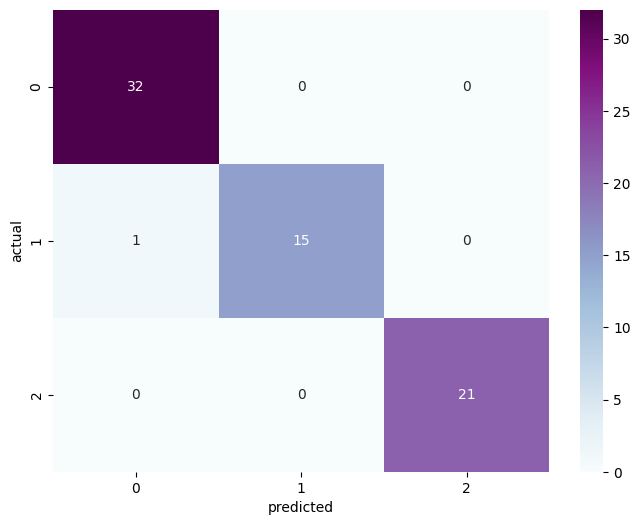

In [21]:
conf_mat = confusion_matrix(ytest, y_pred_log_reg)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="BuPu")
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()


### SVM
#### Training

In [22]:
from sklearn.svm import SVC

In [23]:
svm_model = SVC(kernel='rbf')
svm_model.fit(xtrain, ytrain)


,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


Score on the testing set predictions:

In [24]:
y_pred_svm = svm_model.predict(xtest)
print("Accuracy:", accuracy_score(ytest, y_pred_svm))

Accuracy: 0.6811594202898551


Confusion matrix

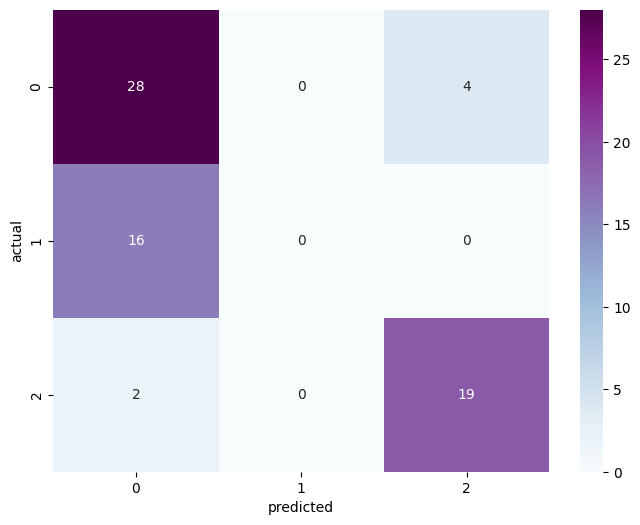

In [25]:
conf_mat = confusion_matrix(ytest, y_pred_svm)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="BuPu")
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

#### Finding the best kernel to train the model

In [26]:
from sklearn.model_selection import GridSearchCV

In [27]:
classifier = SVC()

parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}
              ]

grid_search = GridSearchCV(estimator=classifier,
                           param_grid=parameters,
                           scoring='accuracy',
                           cv=5,
                           n_jobs=-1)

grid_search = grid_search.fit(xtrain, ytrain)
best_accuracy = grid_search.best_score_
print("Highest accuracy:: ", best_accuracy)

best_parameters = grid_search.best_params_
print("Best parameters for the model:", best_parameters)


Highest accuracy::  0.989090909090909
Best parameters for the model: {'C': 1, 'kernel': 'linear'}


#### Training the model with the found best parameters 

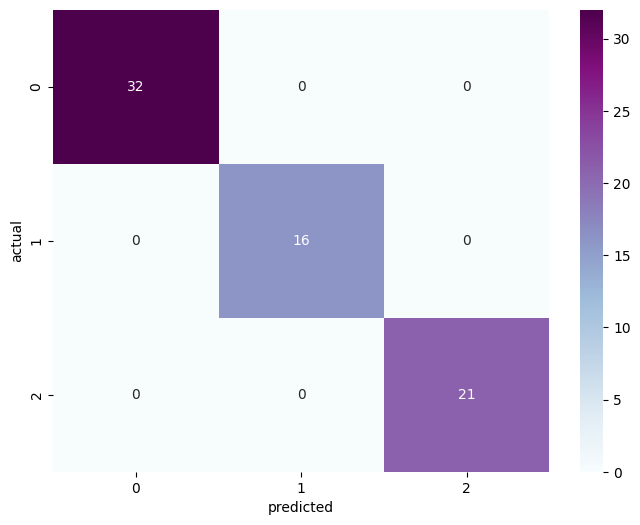

In [28]:
svm_model = SVC(C=1,kernel='linear')
svm_model.fit(xtrain, ytrain)

y_pred_svm = svm_model.predict(xtest)

conf_mat = confusion_matrix(ytest, y_pred_svm)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="BuPu")
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

## Comparison of the models

In [29]:
from sklearn.metrics import classification_report

In [35]:
# classification reports
report_log = classification_report(ytest, y_pred_log_reg, output_dict=True)
report_svm = classification_report(ytest, y_pred_svm, output_dict=True)

metrics = ['precision', 'recall', 'f1-score', 'accuracy']
models = ['Linear regression', 'SVM (linear kernel)']


data = {
    'Model': models,
    'Precision': [report_log['weighted avg']['precision'], report_svm['weighted avg']['precision']],
    'Recall': [report_log['weighted avg']['recall'], report_svm['weighted avg']['recall']],
    'F1-Score': [report_log['weighted avg']['f1-score'], report_svm['weighted avg']['f1-score']],
    'Accuracy': [accuracy_score(ytest, y_pred_log_reg), accuracy_score(ytest, y_pred_svm)]
}

metrics = pd.DataFrame(data)
metrics




,Model,Precision,Recall,F1-Score,Accuracy
0,Linear regression,0.985946,0.985507,0.985385,0.985507
1,SVM (linear kernel),1.000000,1.000000,1.000000,1.000000


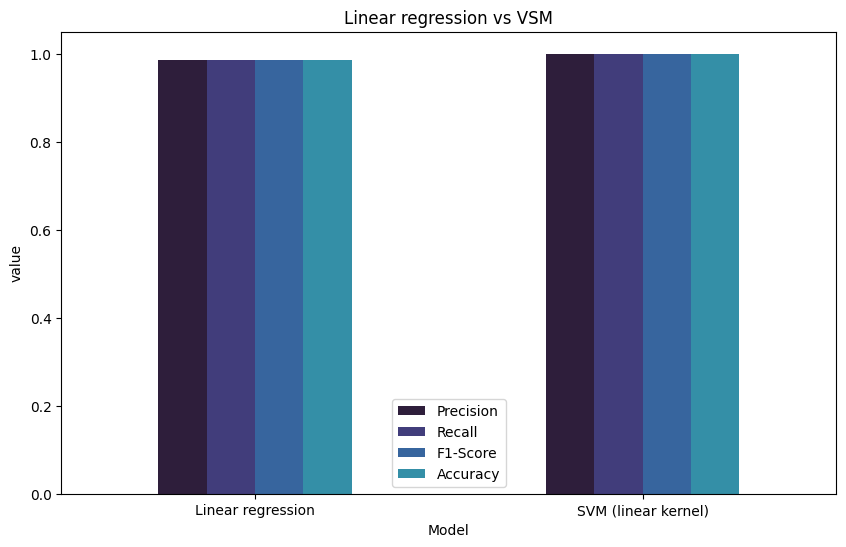

In [36]:
sns.set_palette('mako') 
metrics.set_index('Model').plot(kind='bar', figsize=(10, 6))
plt.title('Linear regression vs VSM')
plt.ylabel('value')

plt.xticks(rotation=0)
plt.legend(loc='best')
plt.show()

## In conclusion
Both models perform perfectly on the dataset, showing excellent results in the scores and final report. The parameters for the SVM had to be determined using a grid search; however, the results made it worthwhile.